Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 7ms/step - loss: 28860.0312
Epoch 803/3300
1/1 [==============================] - 0s 6ms/step - loss: 28856.0664
Epoch 804/3300
1/1 [==============================] - 0s 11ms/step - loss: 28852.0859
Epoch 805/3300
1/1 [==============================] - 0s 6ms/step - loss: 28848.1016
Epoch 806/3300
1/1 [==============================] - 0s 11ms/step - loss: 28844.1113
Epoch 807/3300
1/1 [==============================] - 0s 6ms/step - loss: 28840.1074
Epoch 808/3300
1/1 [==============================] - 0s 13ms/step - loss: 28836.1055
Epoch 809/3300
1/1 [==============================] - 0s 7ms/step - loss: 28832.0918
Epoch 810/3300
1/1 [==============================] - 0s 13ms/step - loss: 28828.0762
Epoch 811/3300
1/1 [==============================] - 0s 7ms/step - loss: 28824.0527
Epoch 812/3300
1/1 [==============================] - 0s 13ms/step - loss: 28820.0215
Epoch 813/3300
1/1 [====

array([[137.94049]], dtype=float32)

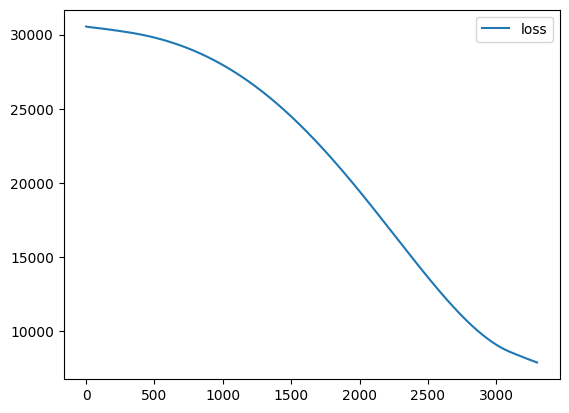

In [ ]:

from google.colab import auth
import gspread
from google.auth import default
import pandas as pd



auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Exp 1 DL').sheet1

data = worksheet.get_all_values()

dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'INPUT':'float'})


dataset1 = dataset1.astype({'OUTPUT':'float'})
dataset1.head()

import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

X

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train1 = scaler.transform(X_train)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([ Dense(units=5,activation='relu',input_shape=[1]),
                  Dense(units=3,activation='relu'),
                  Dense(units=1)])



Streaming output truncated to the last 5000 lines.
Epoch 734/3300
1/1 [==============================] - 0s 8ms/step - loss: 5843.0264
Epoch 735/3300
1/1 [==============================] - 0s 8ms/step - loss: 5840.3462
Epoch 736/3300
1/1 [==============================] - 0s 8ms/step - loss: 5837.6685
Epoch 737/3300
1/1 [==============================] - 0s 11ms/step - loss: 5834.9888
Epoch 738/3300
1/1 [==============================] - 0s 16ms/step - loss: 5832.3091
Epoch 739/3300
1/1 [==============================] - 0s 11ms/step - loss: 5829.6299
Epoch 740/3300
1/1 [==============================] - 0s 10ms/step - loss: 5826.9502
Epoch 741/3300
1/1 [==============================] - 0s 7ms/step - loss: 5824.2700
Epoch 742/3300
1/1 [==============================] - 0s 7ms/step - loss: 5821.5889
Epoch 743/3300
1/1 [==============================] - 0s 11ms/step - loss: 5818.9097
Epoch 744/3300
1/1 [==============================] - 0s 7ms/step - loss: 5816.2295
Epoch 745/3300
1/1 [

array([[129.28252]], dtype=float32)

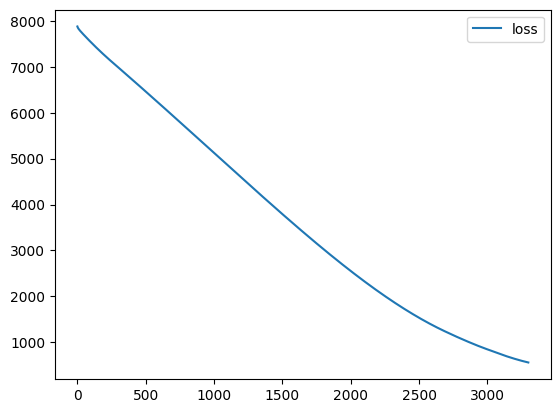

In [ ]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train1,y_train,epochs=3300)

lossdf = pd.DataFrame(model.history.history)
lossdf.plot()



In [ ]:
X_test1 = scaler.transform(X_test)

model.evaluate(X_test1,y_test)

X_n1 = [[7]]

X_n1_1 = scaler.transform(X_n1)

model.predict(X_n1_1)

1/1 [==============================] - 0s 48ms/step


array([[65.477264]], dtype=float32)